In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
#Crio uma variável 'arq' na qual armazena o arquivo a ser aberto
arq = 'C:\\Users\\Samsung\\DS\\keycash\\Desafio_DS.xlsx'

#Crio uma variável 'cab' na qual descreve as colunas da tabela a serem analisadas
cab = ["fonte", "codigo", "nome", "status", "num_pessoas", "num_quartos", 
       "check_in", "check_out", "reservado", "receita_bruta_estimada", "cod_pais",
       "cod_estado", "telefone_1"
      ]

In [4]:
#Associo o DataFrame ao nome 'keycash'
keycash = pd.read_excel(arq,sheet_name="Reservas",
                        header = None ,
                        names = np.array(cab),
                        skiprows = 1
                       )

In [5]:
#Amostragem simples das 5 primeiras linhas a serem analisadas
keycash.head()
keycash.shape

(5192, 13)

In [6]:
#Transformando as colunas 'check_in' e 'check_out' em datatype64
keycash['check_in'] = pd.to_datetime(keycash['check_in'])
keycash['check_out'] = pd.to_datetime(keycash['check_out'])

#Organizando de forma crescente os dias de 'check_in'
keycash.sort_values('check_in')

#Considerando apenas dados em que a receita bruta estimada é maior que 0
#no qual coincide com 'status' de reservas confirmadas
keycash = keycash[keycash['receita_bruta_estimada'] > 0]
keycash.head()

,fonte,codigo,nome,status,num_pessoas,num_quartos,check_in,check_out,reservado,receita_bruta_estimada,cod_pais,cod_estado,telefone_1
0,Site A,6196436,Skylar Farley,Confirmada,1,1,2019-03-10,2019-03-18,2019-02-04,165.50625,55.0,31.0,924742002.0
1,Site A,51250592,Mira Gaines,Confirmada,1,1,2019-03-01,2019-03-16,2019-02-04,382.06875,55.0,551.0,938852939.0
2,Site A,83668198,Jayleen Lowe,Confirmada,2,1,2019-04-05,2019-04-08,2019-02-04,85.85850,55.0,53.0,NaN
3,Site A,50170872,Felipe Orozco,Confirmada,2,1,2019-03-01,2019-03-06,2019-02-04,118.65525,57.0,300.0,NaN
4,Site A,21737901,Sophie Rivers,Confirmada,2,1,2019-04-03,2019-04-07,2019-02-05,108.47025,55.0,11.0,NaN


Vamos realizar uma estimativa de crescimento sobre as unidades disponíveis da Keycash, para prever se o aumento no número condiz com oque a empresa deseja, ou seja, um aumento para 200 unidades nos próximos meses:

In [7]:
data = { 'Mês/Ano': ['Fevereiro/2019', 'Março/2019', 'Abril/2019', 'Maio/2019', 'Junho/2019', 
                     'Julho/2019', 'Agosto/2019', 'Setembro/2019', 'Outubro/2019', 'Novembro/2019'],
        'Unidades': [10, 11, 17, 22, 54, 59, 91, 92, 92, 138]
       }

df = pd.DataFrame(data, columns = ['Mês/Ano', 'Unidades'])
print(df)

          Mês/Ano  Unidades
0  Fevereiro/2019        10
1      Março/2019        11
2      Abril/2019        17
3       Maio/2019        22
4      Junho/2019        54
5      Julho/2019        59
6     Agosto/2019        91
7   Setembro/2019        92
8    Outubro/2019        92
9   Novembro/2019       138


Gráfico sobre a estimativa de aumento de unidades da Keycash

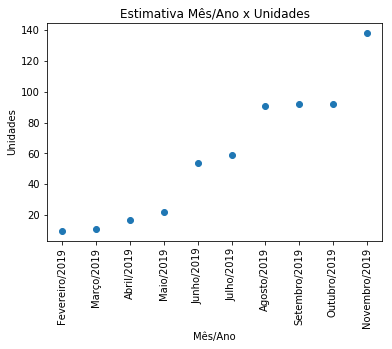

In [20]:
plt.scatter(df['Mês/Ano'], df['Unidades'])
plt.xlabel('Mês/Ano')
plt.xticks(rotation=90)
plt.ylabel('Unidades')
plt.title('Estimativa Mês/Ano x Unidades')
plt.show()

Determinando a melhor curva que descreve os dados

[10.65282175  0.23244039]


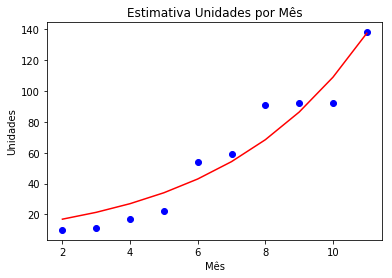

In [23]:
#Determinando a função 
def func(x, a, b):
    return a*np.exp(b*x)

#Determinando os pontos experimentais
x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([10, 11, 17, 22, 54, 59, 91, 92, 92, 138])

#Plotando pontos experimentais
plt.plot(x, y, 'bo', label ='dados')


#Fazendo o curve fitting
popt, pcov = curve_fit(func, x, y)
print(popt)

#Plotting the fitted curve
plt.plot(x, func(x, *popt), 'r', label ='curve fit')
plt.xlabel('Mês')
plt.ylabel('Unidades')
plt.title('Estimativa Unidades por Mês')
plt.savefig('estimativa_unidades_mes.png', bbox_inches='tight')
plt.show()

In [22]:
a = 10.65282175
b = 0.23244039
est_dezembro = func(12, a, b)
est_janeiro = func(13, a, b)
est_fevereiro = func(14, a, b)
print("A estimativa para o número de unidades disponíveis em Dezembro 19' é de", round(est_dezembro))
print("A estimativa para o número de unidades disponíveis em Janeiro 20' é de", round(est_janeiro))
print("A estimativa para o número de unidades disponíveis em Fevereiro 20' é de", round(est_fevereiro))

A estimativa para o número de unidades disponíveis em Dezembro 19' é de 173.0
A estimativa para o número de unidades disponíveis em Janeiro 20' é de 219.0
A estimativa para o número de unidades disponíveis em Fevereiro 20' é de 276.0


Abaixo observamos os valores brutos distribuídos por todos os meses, para se ter apenas uma ideia de quais regiões são mais densas de acordo com os preços de estadia.

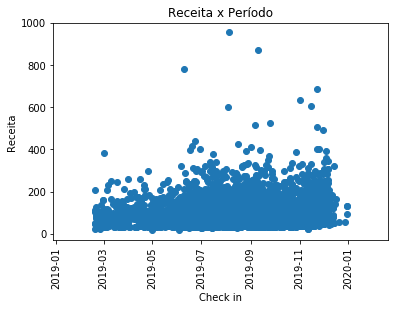

In [24]:
#Gráfico dos valores brutos para cada estadia

l = keycash['check_in']
k = keycash['receita_bruta_estimada']

plt.scatter(l, k)
plt.xlabel('Check in')
plt.xticks(rotation=90)
plt.ylabel('Receita')
plt.title('Receita x Período')
plt.savefig('densidade.png', bbox_inches='tight')
plt.show()

Por conta dos valores de estadia serem variados, uma estratégia é trabalharmos com os valores médios de estadia de cada mês para relizarmos nossa análise.

In [18]:
#Calculando as médias de receita para cada mês (Fev-Dez 19')

#Fevereiro
fev = (keycash['check_in'] >= '2019-02-01') & (keycash['check_in'] <= '2019-02-28')
keycash_fev = keycash[fev]
media_fev = keycash_fev['receita_bruta_estimada'].mean()
print('A receita média do mês de Fevereiro, de uma unidade, foi de ', round(media_fev,1),'$')

#Março
mar = (keycash['check_in'] >= '2019-03-01') & (keycash['check_in'] <= '2019-03-31')
keycash_mar = keycash[mar]
media_mar = keycash_mar['receita_bruta_estimada'].mean()
print('A receita média do mês de Março, de uma unidade, foi de ', round(media_mar,1),'$')

#Abril
abr = (keycash['check_in'] >= '2019-04-01') & (keycash['check_in'] <= '2019-04-30')
keycash_abr = keycash[abr]
media_abr = keycash_abr['receita_bruta_estimada'].mean()
print('A receita média do mês de Abril, de uma unidade, foi de ', round(media_abr,1),'$')

#Maio
mai = (keycash['check_in'] >= '2019-05-01') & (keycash['check_in'] <= '2019-05-31')
keycash_mai = keycash[mai]
media_mai = keycash_mai['receita_bruta_estimada'].mean()
print('A receita média do mês de Maio, de uma unidade, foi de ', round(media_mai,1),'$')

#Junho
jun = (keycash['check_in'] >= '2019-06-01') & (keycash['check_in'] <= '2019-06-30')
keycash_jun = keycash[jun]
media_jun = keycash_jun['receita_bruta_estimada'].mean()
print('A receita média do mês de Junho, de uma unidade, foi de ', round(media_jun,1),'$')

#Julho
jul = (keycash['check_in'] >= '2019-07-01') & (keycash['check_in'] <= '2019-07-31')
keycash_jul = keycash[jul]
media_jul = keycash_jul['receita_bruta_estimada'].mean()
print('A receita média do mês de Julho, de uma unidade, foi de ', round(media_jul,1),'$')

#Agosto
ago = (keycash['check_in'] >= '2019-08-01') & (keycash['check_in'] <= '2019-08-31')
keycash_ago = keycash[ago]
media_ago = keycash_ago['receita_bruta_estimada'].mean()
print('A receita média do mês de Agosto, de uma unidade, foi de ', round(media_ago,1),'$')

#Setembro
sep = (keycash['check_in'] >= '2019-09-01') & (keycash['check_in'] <= '2019-09-30')
keycash_sep = keycash[sep]
media_sep = keycash_sep['receita_bruta_estimada'].mean()
print('A receita média do mês de Setembro, de uma unidade, foi de ', round(media_sep,1),'$')

#Outubro
out = (keycash['check_in'] >= '2019-10-01') & (keycash['check_in'] <= '2019-10-31')
keycash_out = keycash[out]
media_out = keycash_out['receita_bruta_estimada'].mean()
print('A receita média do mês de Outubro, de uma unidade, foi de ', round(media_out,1),'$')

#Novembro
nov = (keycash['check_in'] >= '2019-11-01') & (keycash['check_in'] <= '2019-11-30')
keycash_nov = keycash[nov]
media_nov = keycash_nov['receita_bruta_estimada'].mean()
print('A receita média do mês de Novembro, de uma unidade, foi de ', round(media_nov,1),'$')

#Dezembro
dez = (keycash['check_in'] >= '2019-12-01') & (keycash['check_in'] <= '2019-12-31')
keycash_dez = keycash[dez]
media_dez = keycash_dez['receita_bruta_estimada'].mean()
print('A receita média do mês de Dezembro, de uma unidade, foi de ', round(media_dez,1),'$')

A receita média do mês de Fevereiro, de uma unidade, foi de  73.5 $
A receita média do mês de Março, de uma unidade, foi de  88.1 $
A receita média do mês de Abril, de uma unidade, foi de  96.9 $
A receita média do mês de Maio, de uma unidade, foi de  87.5 $
A receita média do mês de Junho, de uma unidade, foi de  94.7 $
A receita média do mês de Julho, de uma unidade, foi de  99.3 $
A receita média do mês de Agosto, de uma unidade, foi de  102.2 $
A receita média do mês de Setembro, de uma unidade, foi de  106.8 $
A receita média do mês de Outubro, de uma unidade, foi de  97.6 $
A receita média do mês de Novembro, de uma unidade, foi de  106.3 $
A receita média do mês de Dezembro, de uma unidade, foi de  138.6 $


Com os valores médios referentes a uma estadia de uma unidade para cada mês, realizaremos uma regressão no gráfico das receitas por período para assim conseguirmos determinar uma estimativa de meses futuros.

[ 4.05867937 70.81926074]


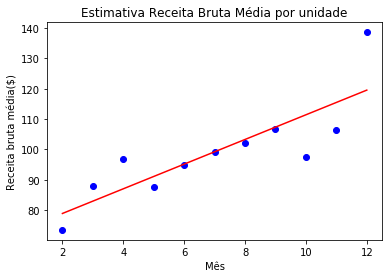

In [19]:
#Gráfico da estimativa de receita

#Determinando a função
def func_lin(x, a, b):
    return a*x+b
    
#Dados experimentais
x = np.array([2,3,4,5,6,7,8,9,10,11,12])
y = np.array([media_fev, media_mar, media_abr,media_mai,media_jun, media_jul, media_ago, media_sep, media_out, media_nov, media_dez])

plt.plot(x, y, 'bo')

#Fazendo o curve fitting
popt, pcov = curve_fit(func_lin, x, y)
print(popt)

#Plotting the fitted curve
plt.plot(x, func_lin(x, *popt), 'r', label ='curve fit')
plt.xlabel('Mês')
plt.ylabel('Receita bruta média($)')
plt.title('Estimativa Receita Bruta Média por unidade')
plt.savefig('estimativa_receita_mes.png', bbox_inches='tight')
plt.show()

In [9]:
#Forecast para os meses de Jan 20' e Fev 20'

forecast_dez = (4.05867937)*12 + 70.81926074
forecast_jan = (4.05867937)*13 + 70.81926074
forecast_fev = (4.05867937)*14 + 70.81926074
print("O forecast para Dez 19' é de ", round(forecast_dez),'$', 'por unidade')
print("O forecast para Jan 20' é de ", round(forecast_jan),'$', 'por unidade')
print("O forecast para Fev 20' é de ", round(forecast_fev),'$', 'por unidade')

O forecast para Dez 19' é de  120 $ por unidade
O forecast para Jan 20' é de  124 $ por unidade
O forecast para Fev 20' é de  128 $ por unidade


Abaixo calcularemos a quantidade de reservas confirmadas em cada mês de 2019

In [26]:
#Calculando a quantidade de reservas por mês em 19'

#Fev 19'
keycash_fev = keycash[fev]
volume_fev = len(keycash_fev)
print('No mês de Fevereiro houve um total de', volume_fev, 'reservas confirmadas')

#Março 19'
keycash_mar = keycash[mar]
volume_mar = len(keycash_mar)
print('No mês de Março houve um total de', volume_mar, 'reservas confirmadas')

#Abril 19'
keycash_abr = keycash[abr]
volume_abr = len(keycash_abr)
print('No mês de Abril houve um total de', volume_abr, 'reservas confirmadas')

#Maio 19'
keycash_mai = keycash[mai]
volume_mai = len(keycash_mai)
print('No mês de Maio houve um total de', volume_mai, 'reservas confirmadas')

#Junho 19'
keycash_jun = keycash[jun]
volume_jun = len(keycash_jun)
print('No mês de Junho houve um total de', volume_jun, 'reservas confirmadas')

#Julho 19'
keycash_jul = keycash[jul]
volume_jul = len(keycash_jul)
print('No mês de Julho houve um total de', volume_jul, 'reservas confirmadas')

#Agosto 19'
keycash_ago = keycash[ago]
volume_ago = len(keycash_ago)
print('No mês de Agosto houve um total de', volume_ago, 'reservas confirmadas')

#Setembro 19'
keycash_sep = keycash[sep]
volume_sep = len(keycash_sep)
print('No mês de Setembro houve um total de', volume_sep, 'reservas confirmadas')

#Outubro 19'
keycash_out = keycash[out]
volume_out = len(keycash_out)
print('No mês de Outubro houve um total de', volume_out, 'reservas confirmadas')

#Novembro 19'
keycash_nov = keycash[nov]
volume_nov = len(keycash_nov)
print('No mês de Novembro houve um total de', volume_nov, 'reservas confirmadas')

#Dezembro 19'
keycash_dez = keycash[dez]
volume_dez = len(keycash_dez)
print('No mês de Dezembro houve um total de', volume_dez, 'reservas confirmadas')

No mês de Fevereiro houve um total de 40 reservas confirmadas
No mês de Março houve um total de 106 reservas confirmadas
No mês de Abril houve um total de 113 reservas confirmadas
No mês de Maio houve um total de 217 reservas confirmadas
No mês de Junho houve um total de 491 reservas confirmadas
No mês de Julho houve um total de 545 reservas confirmadas
No mês de Agosto houve um total de 650 reservas confirmadas
No mês de Setembro houve um total de 682 reservas confirmadas
No mês de Outubro houve um total de 599 reservas confirmadas
No mês de Novembro houve um total de 830 reservas confirmadas
No mês de Dezembro houve um total de 176 reservas confirmadas


Abaixo calcularemos a receita média bruta de cada mês, multiplicando o valor médio de uma unidade do mês correspondente, multiplicado pelo volume de reservas confirmadas no mesmo mês:

In [27]:
#Calculando a receita média bruta para cada mês
#multiplicando o número de reservas confirmadas naquele mês 
#pela média de custo de uma unidade no mesmo mês

#Fev 19'
fev = media_fev*volume_fev
print("No mês de Fev 19' a receita média bruta é de", round(fev,2), '$')

#Março 19'
mar = media_mar*volume_mar
print("No mês de Mar 19' a receita média bruta é de", round(mar,2), '$')

#Abril 19'
abr = media_abr*volume_abr
print("No mês de Abril 19' a receita média bruta é de", round(abr,2), '$')

#Maio 19'
mai = media_mai*volume_mai
print("No mês de Maio 19' a receita média bruta é de", round(mai,2), '$')

#Junho 19'
jun = media_jun*volume_jun
print("No mês de Junho 19' a receita média bruta é de", round(jun,2), '$')

#Julho 19'
jul = media_jul*volume_jul
print("No mês de Julho 19' a receita média bruta é de", round(jul,2), '$')

#Agosto 19'
ago = media_jul*volume_ago
print("No mês de Agosto 19' a receita média bruta é de", round(ago,2), '$')

#Setembro 19'
sep = media_sep*volume_sep
print("No mês de Setembro 19' a receita média bruta é de", round(sep,2), '$')

#Outubro 19'
out = media_out*volume_out
print("No mês de Outubro 19' a receita média bruta é de", round(out,2), '$')

#Novembro 19'
nov = media_nov*volume_nov
print("No mês de Novembro 19' a receita média bruta é de", round(nov,2), '$')

#Dezembro 19'
dez = media_dez*volume_dez
print("No mês de Dezembro 19' a receita média bruta é de", round(dez,2), '$')

No mês de Fev 19' a receita média bruta é de 2941.02 $
No mês de Mar 19' a receita média bruta é de 9338.39 $
No mês de Abril 19' a receita média bruta é de 10945.2 $
No mês de Maio 19' a receita média bruta é de 18987.92 $
No mês de Junho 19' a receita média bruta é de 46519.37 $
No mês de Julho 19' a receita média bruta é de 54104.89 $
No mês de Agosto 19' a receita média bruta é de 64528.77 $
No mês de Setembro 19' a receita média bruta é de 72856.52 $
No mês de Outubro 19' a receita média bruta é de 58460.62 $
No mês de Novembro 19' a receita média bruta é de 88254.82 $
No mês de Dezembro 19' a receita média bruta é de 24387.56 $


Com esses valores de receitas médias, é possível estimar o número de reservas para Janeiro e Fevereiro de 2020

[  89.44848439 -154.1151476 ]


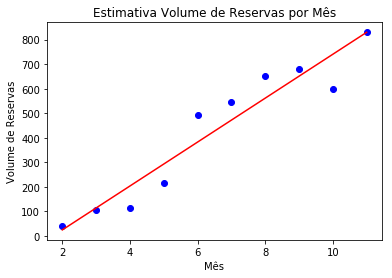

In [28]:
#Estimando o número de reservas para os meses de Jan 20' e Fev 20'

#Gráfico do (Volume de Reservas x Mês)
x = np.array([2,3,4,5,6,7,8,9,10,11])
yData = np.array([volume_fev, volume_mar, volume_abr, volume_mai, volume_jun,
         volume_jul, volume_ago, volume_sep, volume_out, volume_nov])
plt.plot(x, yData, 'bo')

#Determinando a função que melhor ajusta aos dados
def func_linear(x, m, n):
    return m*x+n

#Fazendo o curve fitting
popt, pcov = curve_fit(func_linear, x, yData)
print(popt)

#Plotting the fitted curve
plt.plot(x, func_linear(x, *popt), 'r', label ='curve fit')
plt.xlabel('Mês')
plt.ylabel('Volume de Reservas')
plt.title('Estimativa Volume de Reservas por Mês')
plt.savefig('estimativa_volume_mes.png', bbox_inches='tight')
plt.show()

#Coeficiente linear
m = 89.44848439
n = -154.1151476

In [17]:
#Estimativa do volume de reservas e de receitas para Jan 20' e Fev 20'

#Jan 20'
volume_estimado_jan = m*13+n
receita_estimada_janeiro = volume_estimado_jan*forecast_jan
print('O volume estimado de reservas para o mês de Janeiro de 2020 é de ', round(volume_estimado_jan))
print('A receita média bruta para o mês de Janeiro de 2020 é de', round(receita_estimada_janeiro,2))

#Fev 20'
volume_estimado_fev = m*14+n
receita_estimada_fevereiro = volume_estimado_fev*forecast_fev
print('O volume estimado de reservas para o mês de Fevereiro de 2020 é de ', round(volume_estimado_fev))
print('A receita média bruta para o mês de Fevereiro de 2020 é de', round(receita_estimada_fevereiro,2))


O volume estimado de reservas para o mês de Janeiro de 2020 é de  1009
A receita média bruta para o mês de Janeiro de 2020 é de 124659.13
O volume estimado de reservas para o mês de Fevereiro de 2020 é de  1098
A receita média bruta para o mês de Fevereiro de 2020 é de 140170.45


Também é possível extrairmos a porcentagem em que cada site têm sobre o total de reservas efetuadas:

In [18]:
#Número total de reservas do nosso dataframe
reservas_totais = keycash.shape[0]
print('O número total de reservas efetuadas é de', reservas_totais)

#Verificando a quantidade de reservas que são do Site A e do Site B

#Site A
site_a = keycash[keycash['fonte'] == 'Site A']
site_a_total = site_a.shape[0]
print('O número total de reservas efetuadas somente pelo Site A é de', site_a_total)
print('A porcentagem de reservas efetuadas pelo Site A é de', round(100*site_a_total/reservas_totais,1),'%')

#Site B - apenas subtrair a porcentagem de A de 100%
print('A porcentagem de reservas efetuadas pelo Site B é de', 100-73.5,'%')

O número total de reservas efetuadas é de 4449
O número total de reservas efetuadas somente pelo Site A é de 3271
A porcentagem de reservas efetuadas pelo Site A é de 73.5 %
A porcentagem de reservas efetuadas pelo Site B é de 26.5 %


Observamos primeiro que apesar do Site A ter a menor taxa de serviço, o mesmo site é responsável pela grande maioria das reservas efetuadas.

Os valores referentes a custo operacional por unidade extrapolam o valor médio por unidade que foi calculado e estimado para os meses de Janeiro de 2019 até Janeiro de 2020. Sendo assim, em média cada unidade estaria dando prejuízos a empresa, oque compromete a saúde financeira da mesma.

Uma possível solução é reavaliar a quantia gasta em despesas fixas, no qual é o maior montante referente a custos por unidade, de modo que o valor médio por unidade seja maior, ocasionando lucro por cada unidade reservada. Temos também apenas dados de custo operacional para o mês de Julho, e observamos que o custo operacional de pessoas é alto comparado ao valor médio de uma unidade calculado. Isso também contribui negativamente para a saúde do negocio, no qual é desejável que o valor de cada unidade supere os gastos por unidade.

Além disso, os gráficos avaliam um período de apenas um ano. Seria ideal obter dados sobre um período maior para assim identificar possíveis tendências como sazonalidade. As curvas de regressão escolhidas(exponencial e linear) se baseiam nesse fato de estarmos trabalhando com um curto período. Provavelmente uma curva com uma certa periodicidade seria observada, levando em conta por exemplo que nos meses do último trimestre, devido a datas festivas, devem concentrar um maior volume de reservas.

Observa-se inclusive que no mês de Dezembro a receita bruta média é muito abaixo do esperado, e assim identificamos que algo nesse período deve ter ocorrido, oque resultou nessa baixa de valor de receita. 

O gráfico de estimativa de crescimento de unidades por mês por exemplo, seria esperado observar uma curva logística, porém pela falta de um período mais longo para ser analisado, foi escolhida a curva exponencial para analisar a tendência, na qual a primeira instância é uma boa curva para descrição desses dados.

